## Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  RocCurveDisplay,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# NOTE: Not all of the libraries listed were use but are there because of the relation can have with the project

## Data

In [2]:
import chardet

with open("../FinalProject/tabla-principal-patrociniotu.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("../FinalProject/tabla-principal-patrociniotu.csv", encoding=result['encoding'])


In [3]:
df

,Month,01 Bayamon entradas,02 Deportivo entradas,03 Jardines entradas,04 Torrimar entradas,05 Martinez Nadal entradas,06 Las Lomas entradas,07 San Francisco entradas,08 Centro Medico entradas,09 Cupey entradas,...,08 Centro Medico Salidas,09 Cupey Salidas,10 Rio Piedras Salidas,11 Universidad Salidas,12 Piñero Salidas,13 Domenech Salidas,14 Roosevelt Salidas,15 Hato Rey Salidas,16 Sagrado Corazon Salidas,Total Salidas
0,1/1/2010,"80,600","77,677","11,293","16,808","47,797","17,040","35,450","51,473","28,619",...,54009,27402,62187,40129,26769,22041,32166,36774,91442,676134
1,2/1/2010,"92,126","92,312","13,018","18,653","53,642","20,636","38,382","61,697","39,095",...,63621,38442,69641,72870,31909,27873,37367,32620,85314,793454
2,3/1/2010,"101,720","100,045","14,263","19,543","58,111","23,321","41,555","68,864","40,932",...,71153,39767,73831,77079,34904,30669,41925,37043,93291,860799
3,4/1/2010,"87,015","82,708","12,311","17,114","49,165","20,348","37,185","59,156","35,414",...,61055,34433,62365,49558,30716,27087,37005,32408,82107,724457
4,5/1/2010,"89,439","82,142","13,865","17,281","49,681","21,182","41,151","62,734","34,189",...,64056,32531,77510,25023,33507,27058,36819,40458,88541,743093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,10/1/2020,"1,318","1,242",406,359,846,560,765,"1,005",542,...,930,553,1744,353,686,681,440,317,2517,"12,890"
130,11/1/2020,"6,088","5,195","1,953","1,874","3,561","2,889","3,798","4,318","2,632",...,4257,2559,7453,1666,2949,2612,1918,1438,12450,"61,184"
131,12/1/2020,"7,055","6,121","2,120","2,360","4,337","3,370","4,416","4,974","3,147",...,4714,3092,8419,1774,3465,3125,2162,1537,13876,"69,803"
132,1/1/2021,"7,512","6,675","2,018","2,169","4,447","3,294","4,518","5,402","3,256",...,"4,929","3,464","8,071","2,086","3,456","3,313","2,138","1,653","14,184","69,212"


In [4]:
NaN = df.isnull().sum()
TotalNaN = df.isnull().sum().sum()
print(f"Missing values for each variable: {NaN}")
print(f"Total missing values: {TotalNaN}")

Missing values for each variable: Month                          0
01 Bayamon entradas            0
02 Deportivo entradas          0
03 Jardines entradas           0
04 Torrimar entradas           0
05 Martinez Nadal entradas     0
06 Las Lomas entradas          0
07 San Francisco entradas      0
08 Centro Medico entradas      0
09 Cupey entradas              0
10 Rio Piedras entradas        0
11 Universidad entradas        1
12 Piñero entradas             0
13 Domenech entradas           1
14 Roosevelt entradas          0
15 Hato Rey entradas           0
16 Sagrado Corazon entradas    0
Total entradas                 0
01 Bayamon Salidas             3
02 Deportivo Salidas           3
03 Jardines Salidas            3
04 Torrimar Salidas            3
05 Martinez Nadal Salidas      3
06 Las Lomas Salidas           3
07 San Francisco Salidas       3
08 Centro Medico Salidas       3
09 Cupey Salidas               3
10 Rio Piedras Salidas         3
11 Universidad Salidas         3
12 Piñero

In [5]:
df_cleaned = df.dropna()
# Replacing spaces with underscores in column names
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '_')
df_cleaned

,Month,01_Bayamon_entradas,02_Deportivo_entradas,03_Jardines_entradas,04_Torrimar_entradas,05_Martinez_Nadal_entradas,06_Las_Lomas_entradas,07_San_Francisco_entradas,08_Centro_Medico_entradas,09_Cupey_entradas,...,08_Centro_Medico_Salidas,09_Cupey_Salidas,10_Rio_Piedras_Salidas,11_Universidad_Salidas,12_Piñero_Salidas,13_Domenech_Salidas,14_Roosevelt_Salidas,15_Hato_Rey_Salidas,16_Sagrado_Corazon_Salidas,Total_Salidas_
0,1/1/2010,"80,600","77,677","11,293","16,808","47,797","17,040","35,450","51,473","28,619",...,54009,27402,62187,40129,26769,22041,32166,36774,91442,676134
1,2/1/2010,"92,126","92,312","13,018","18,653","53,642","20,636","38,382","61,697","39,095",...,63621,38442,69641,72870,31909,27873,37367,32620,85314,793454
2,3/1/2010,"101,720","100,045","14,263","19,543","58,111","23,321","41,555","68,864","40,932",...,71153,39767,73831,77079,34904,30669,41925,37043,93291,860799
3,4/1/2010,"87,015","82,708","12,311","17,114","49,165","20,348","37,185","59,156","35,414",...,61055,34433,62365,49558,30716,27087,37005,32408,82107,724457
4,5/1/2010,"89,439","82,142","13,865","17,281","49,681","21,182","41,151","62,734","34,189",...,64056,32531,77510,25023,33507,27058,36819,40458,88541,743093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,10/1/2020,"1,318","1,242",406,359,846,560,765,"1,005",542,...,930,553,1744,353,686,681,440,317,2517,"12,890"
130,11/1/2020,"6,088","5,195","1,953","1,874","3,561","2,889","3,798","4,318","2,632",...,4257,2559,7453,1666,2949,2612,1918,1438,12450,"61,184"
131,12/1/2020,"7,055","6,121","2,120","2,360","4,337","3,370","4,416","4,974","3,147",...,4714,3092,8419,1774,3465,3125,2162,1537,13876,"69,803"
132,1/1/2021,"7,512","6,675","2,018","2,169","4,447","3,294","4,518","5,402","3,256",...,"4,929","3,464","8,071","2,086","3,456","3,313","2,138","1,653","14,184","69,212"


In [6]:
numeric_columns = df_cleaned.columns[1:]
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].replace({',': ''}, regex=True).astype(float)
df_cleaned[numeric_columns]

C:\Users\user\AppData\Local\Temp\ipykernel_5788\1167150289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = df_cleaned[numeric_columns].replace({',': ''}, regex=True).astype(float)


,01_Bayamon_entradas,02_Deportivo_entradas,03_Jardines_entradas,04_Torrimar_entradas,05_Martinez_Nadal_entradas,06_Las_Lomas_entradas,07_San_Francisco_entradas,08_Centro_Medico_entradas,09_Cupey_entradas,10_Rio_Piedras_entradas,...,08_Centro_Medico_Salidas,09_Cupey_Salidas,10_Rio_Piedras_Salidas,11_Universidad_Salidas,12_Piñero_Salidas,13_Domenech_Salidas,14_Roosevelt_Salidas,15_Hato_Rey_Salidas,16_Sagrado_Corazon_Salidas,Total_Salidas_
0,80600.0,77677.0,11293.0,16808.0,47797.0,17040.0,35450.0,51473.0,28619.0,57444.0,...,54009.0,27402.0,62187.0,40129.0,26769.0,22041.0,32166.0,36774.0,91442.0,676134.0
1,92126.0,92312.0,13018.0,18653.0,53642.0,20636.0,38382.0,61697.0,39095.0,63805.0,...,63621.0,38442.0,69641.0,72870.0,31909.0,27873.0,37367.0,32620.0,85314.0,793454.0
2,101720.0,100045.0,14263.0,19543.0,58111.0,23321.0,41555.0,68864.0,40932.0,68010.0,...,71153.0,39767.0,73831.0,77079.0,34904.0,30669.0,41925.0,37043.0,93291.0,860799.0
3,87015.0,82708.0,12311.0,17114.0,49165.0,20348.0,37185.0,59156.0,35414.0,59284.0,...,61055.0,34433.0,62365.0,49558.0,30716.0,27087.0,37005.0,32408.0,82107.0,724457.0
4,89439.0,82142.0,13865.0,17281.0,49681.0,21182.0,41151.0,62734.0,34189.0,72216.0,...,64056.0,32531.0,77510.0,25023.0,33507.0,27058.0,36819.0,40458.0,88541.0,743093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1318.0,1242.0,406.0,359.0,846.0,560.0,765.0,1005.0,542.0,1986.0,...,930.0,553.0,1744.0,353.0,686.0,681.0,440.0,317.0,2517.0,12890.0
130,6088.0,5195.0,1953.0,1874.0,3561.0,2889.0,3798.0,4318.0,2632.0,8863.0,...,4257.0,2559.0,7453.0,1666.0,2949.0,2612.0,1918.0,1438.0,12450.0,61184.0
131,7055.0,6121.0,2120.0,2360.0,4337.0,3370.0,4416.0,4974.0,3147.0,10005.0,...,4714.0,3092.0,8419.0,1774.0,3465.0,3125.0,2162.0,1537.0,13876.0,69803.0
132,7512.0,6675.0,2018.0,2169.0,4447.0,3294.0,4518.0,5402.0,3256.0,9986.0,...,4929.0,3464.0,8071.0,2086.0,3456.0,3313.0,2138.0,1653.0,14184.0,69212.0


In [7]:
df_cleaned = df_cleaned.copy()
df_cleaned['Month'] = pd.to_datetime(df_cleaned['Month'])
df_cleaned

,Month,01_Bayamon_entradas,02_Deportivo_entradas,03_Jardines_entradas,04_Torrimar_entradas,05_Martinez_Nadal_entradas,06_Las_Lomas_entradas,07_San_Francisco_entradas,08_Centro_Medico_entradas,09_Cupey_entradas,...,08_Centro_Medico_Salidas,09_Cupey_Salidas,10_Rio_Piedras_Salidas,11_Universidad_Salidas,12_Piñero_Salidas,13_Domenech_Salidas,14_Roosevelt_Salidas,15_Hato_Rey_Salidas,16_Sagrado_Corazon_Salidas,Total_Salidas_
0,2010-01-01,80600.0,77677.0,11293.0,16808.0,47797.0,17040.0,35450.0,51473.0,28619.0,...,54009.0,27402.0,62187.0,40129.0,26769.0,22041.0,32166.0,36774.0,91442.0,676134.0
1,2010-02-01,92126.0,92312.0,13018.0,18653.0,53642.0,20636.0,38382.0,61697.0,39095.0,...,63621.0,38442.0,69641.0,72870.0,31909.0,27873.0,37367.0,32620.0,85314.0,793454.0
2,2010-03-01,101720.0,100045.0,14263.0,19543.0,58111.0,23321.0,41555.0,68864.0,40932.0,...,71153.0,39767.0,73831.0,77079.0,34904.0,30669.0,41925.0,37043.0,93291.0,860799.0
3,2010-04-01,87015.0,82708.0,12311.0,17114.0,49165.0,20348.0,37185.0,59156.0,35414.0,...,61055.0,34433.0,62365.0,49558.0,30716.0,27087.0,37005.0,32408.0,82107.0,724457.0
4,2010-05-01,89439.0,82142.0,13865.0,17281.0,49681.0,21182.0,41151.0,62734.0,34189.0,...,64056.0,32531.0,77510.0,25023.0,33507.0,27058.0,36819.0,40458.0,88541.0,743093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-10-01,1318.0,1242.0,406.0,359.0,846.0,560.0,765.0,1005.0,542.0,...,930.0,553.0,1744.0,353.0,686.0,681.0,440.0,317.0,2517.0,12890.0
130,2020-11-01,6088.0,5195.0,1953.0,1874.0,3561.0,2889.0,3798.0,4318.0,2632.0,...,4257.0,2559.0,7453.0,1666.0,2949.0,2612.0,1918.0,1438.0,12450.0,61184.0
131,2020-12-01,7055.0,6121.0,2120.0,2360.0,4337.0,3370.0,4416.0,4974.0,3147.0,...,4714.0,3092.0,8419.0,1774.0,3465.0,3125.0,2162.0,1537.0,13876.0,69803.0
132,2021-01-01,7512.0,6675.0,2018.0,2169.0,4447.0,3294.0,4518.0,5402.0,3256.0,...,4929.0,3464.0,8071.0,2086.0,3456.0,3313.0,2138.0,1653.0,14184.0,69212.0


In [8]:
# Detect outliers using Z-score
from scipy import stats
z_scores = stats.zscore(df_cleaned['Total_Salidas_'])
outliers = (z_scores > 3) | (z_scores < -3)
print(df_cleaned[outliers])


Empty DataFrame
Columns: [Month, 01_Bayamon_entradas, 02_Deportivo_entradas, 03_Jardines_entradas, 04_Torrimar_entradas, 05_Martinez_Nadal_entradas, 06_Las_Lomas_entradas, 07_San_Francisco_entradas, 08_Centro_Medico_entradas, 09_Cupey_entradas, 10_Rio_Piedras_entradas, 11_Universidad_entradas, 12_Piñero_entradas, 13_Domenech_entradas, 14_Roosevelt_entradas, 15_Hato_Rey_entradas, 16_Sagrado_Corazon_entradas, Total_entradas_, 01_Bayamon_Salidas, 02_Deportivo_Salidas, 03_Jardines_Salidas, 04_Torrimar_Salidas, 05_Martinez_Nadal_Salidas, 06_Las_Lomas_Salidas, 07_San_Francisco_Salidas, 08_Centro_Medico_Salidas, 09_Cupey_Salidas, 10_Rio_Piedras_Salidas, 11_Universidad_Salidas, 12_Piñero_Salidas, 13_Domenech_Salidas, 14_Roosevelt_Salidas, 15_Hato_Rey_Salidas, 16_Sagrado_Corazon_Salidas, Total_Salidas_]
Index: []

[0 rows x 35 columns]


In [58]:
# Detect outliers using Z-score
from scipy import stats
z_scores = stats.zscore(df_cleaned['Total_entradas_'])
outliers = (z_scores > 3) | (z_scores < -3)
print(df_cleaned[outliers])


Empty DataFrame
Columns: [Month, 01_Bayamon_entradas, 02_Deportivo_entradas, 03_Jardines_entradas, 04_Torrimar_entradas, 05_Martinez_Nadal_entradas, 06_Las_Lomas_entradas, 07_San_Francisco_entradas, 08_Centro_Medico_entradas, 09_Cupey_entradas, 10_Rio_Piedras_entradas, 11_Universidad_entradas, 12_Piñero_entradas, 13_Domenech_entradas, 14_Roosevelt_entradas, 15_Hato_Rey_entradas, 16_Sagrado_Corazon_entradas, Total_entradas_, 01_Bayamon_Salidas, 02_Deportivo_Salidas, 03_Jardines_Salidas, 04_Torrimar_Salidas, 05_Martinez_Nadal_Salidas, 06_Las_Lomas_Salidas, 07_San_Francisco_Salidas, 08_Centro_Medico_Salidas, 09_Cupey_Salidas, 10_Rio_Piedras_Salidas, 11_Universidad_Salidas, 12_Piñero_Salidas, 13_Domenech_Salidas, 14_Roosevelt_Salidas, 15_Hato_Rey_Salidas, 16_Sagrado_Corazon_Salidas, Total_Salidas_]
Index: []


In [9]:
pd.set_option('display.max_columns', None)
df_cleaned.describe()

,01_Bayamon_entradas,02_Deportivo_entradas,03_Jardines_entradas,04_Torrimar_entradas,05_Martinez_Nadal_entradas,06_Las_Lomas_entradas,07_San_Francisco_entradas,08_Centro_Medico_entradas,09_Cupey_entradas,10_Rio_Piedras_entradas,11_Universidad_entradas,12_Piñero_entradas,13_Domenech_entradas,14_Roosevelt_entradas,15_Hato_Rey_entradas,16_Sagrado_Corazon_entradas,Total_entradas_,01_Bayamon_Salidas,02_Deportivo_Salidas,03_Jardines_Salidas,04_Torrimar_Salidas,05_Martinez_Nadal_Salidas,06_Las_Lomas_Salidas,07_San_Francisco_Salidas,08_Centro_Medico_Salidas,09_Cupey_Salidas,10_Rio_Piedras_Salidas,11_Universidad_Salidas,12_Piñero_Salidas,13_Domenech_Salidas,14_Roosevelt_Salidas,15_Hato_Rey_Salidas,16_Sagrado_Corazon_Salidas,Total_Salidas_
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,78109.553846,68289.376923,11346.176923,14005.592308,41543.592308,18314.200000,32994.584615,47785.484615,35528.123077,60290.815385,44333.153846,26214.115385,22113.269231,31389.815385,27092.461538,81586.861538,6.409397e+05,77325.484615,60039.784615,10525.700000,14184.176923,42243.923077,17153.892308,28008.353846,48157.030769,34040.769231,61969.823077,40467.676923,26303.984615,20034.476923,28993.969231,22187.323077,79821.276923,6.114578e+05
std,34031.079976,33748.958931,5329.677070,6504.094967,19269.925438,8177.808401,16155.999909,21561.460750,17271.518633,29151.998448,23628.877090,13203.717837,11670.759591,12957.561669,13780.381141,35918.238673,2.924780e+05,38602.839858,33605.453028,5236.058497,6535.083478,19714.001333,7589.497955,14089.946113,23088.841894,16827.962939,33166.823430,24966.882251,14216.319311,11304.427616,14041.815277,11458.650809,33092.425648,2.979332e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,59939.750000,44283.250000,7822.000000,9201.500000,28679.500000,12615.500000,19052.250000,32873.250000,25358.250000,37946.500000,26847.000000,17025.250000,13707.750000,25636.250000,20433.250000,60048.000000,4.456810e+05,47476.000000,30031.750000,6688.250000,9149.500000,27887.500000,12426.000000,15445.500000,31279.000000,24791.500000,32763.750000,20836.250000,13502.250000,10720.000000,18502.750000,15030.750000,64468.500000,3.739032e+05
50%,85012.000000,73294.000000,11319.500000,14998.000000,44198.500000,20001.500000,36082.000000,51104.500000,36794.500000,63461.500000,42945.500000,28846.500000,25193.500000,34302.000000,26576.000000,86294.500000,6.787815e+05,88621.500000,66962.000000,10573.500000,15721.000000,47443.000000,18639.500000,31648.000000,50435.500000,35816.500000,64545.500000,39802.000000,29767.500000,23822.000000,32749.500000,22335.500000,86126.500000,6.710720e+05
75%,104112.000000,97174.000000,16273.000000,19494.250000,56381.000000,24871.750000,46640.250000,65083.250000,47712.250000,87814.500000,62963.250000,36517.750000,31860.250000,41004.750000,35264.250000,109274.500000,8.720175e+05,108731.250000,88602.500000,15226.250000,19518.250000,58090.000000,23097.750000,39435.500000,68401.250000,45239.000000,93944.000000,60974.750000,37995.250000,30033.250000,39676.250000,29618.000000,103623.750000,8.562525e+05
max,135307.000000,125386.000000,19664.000000,24898.000000,77446.000000,31585.000000,59477.000000,81903.000000,72095.000000,103596.000000,92630.000000,47720.000000,41534.000000,52644.000000,74231.000000,172952.000000,1.148211e+06,139653.000000,119735.000000,18763.000000,24930.000000,76668.000000,29034.000000,50294.000000,84486.00000

In [60]:
pd.set_option('display.max_columns', None)
df_cleaned[['01_Bayamon_entradas','01_Bayamon_Salidas','16_Sagrado_Corazon_entradas','16_Sagrado_Corazon_Salidas','Total_entradas_','Total_Salidas_']].describe()

,01_Bayamon_entradas,01_Bayamon_Salidas,16_Sagrado_Corazon_entradas,16_Sagrado_Corazon_Salidas,Total_entradas_,Total_Salidas_
count,130.000000,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02
mean,78109.553846,77325.484615,81586.861538,79821.276923,6.409397e+05,6.114578e+05
std,34031.079976,38602.839858,35918.238673,33092.425648,2.924780e+05,2.979332e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,59939.750000,47476.000000,60048.000000,64468.500000,4.456810e+05,3.739032e+05
50%,85012.000000,88621.500000,86294.500000,86126.500000,6.787815e+05,6.710720e+05
75%,104112.000000,108731.250000,109274.500000,103623.750000,8.720175e+05,8.562525e+05
max,135307.000000,139653.000000,172952.000000,151261.000000,1.148211e+06,1.112358e+06


## Plots

Histograms

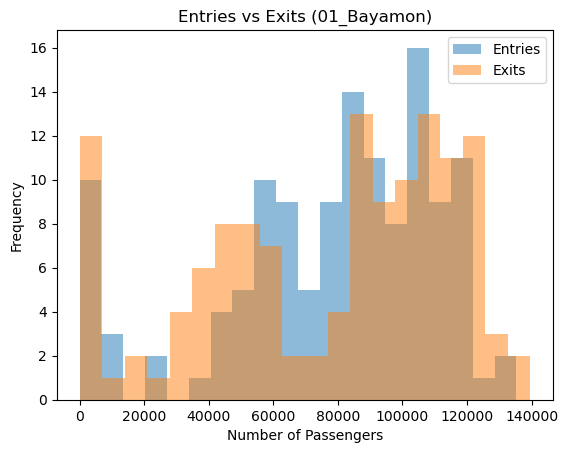

In [261]:
plt.hist(df_cleaned['01_Bayamon_entradas'], bins=20, alpha=0.5, label='Entries')
plt.hist(df_cleaned['01_Bayamon_Salidas'], bins=20, alpha=0.5, label='Exits')
plt.title('Entries vs Exits (01_Bayamon)')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


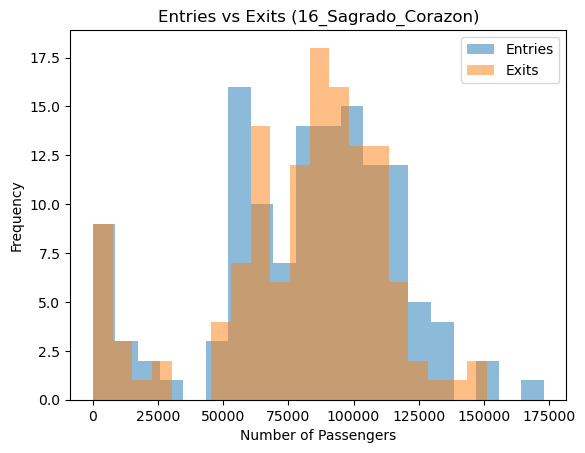

In [271]:
plt.hist(df_cleaned['16_Sagrado_Corazon_entradas'], bins=20, alpha=0.5, label='Entries')
plt.hist(df_cleaned['16_Sagrado_Corazon_Salidas'], bins=20, alpha=0.5, label='Exits')
plt.title('Entries vs Exits (16_Sagrado_Corazon)')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


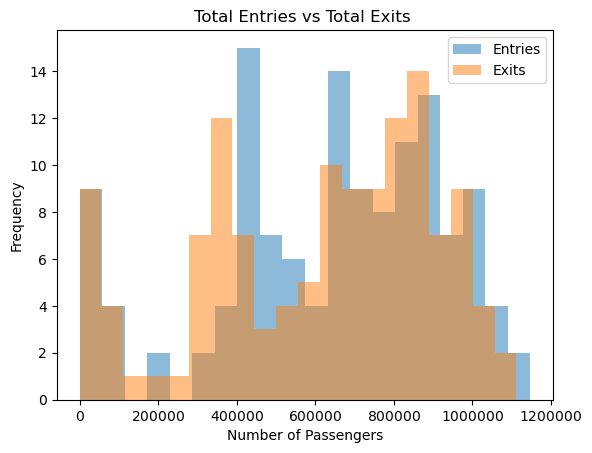

In [266]:
from matplotlib.ticker import ScalarFormatter
plt.hist(df_cleaned['Total_entradas_'], bins=20, alpha=0.5, label='Entries')
plt.hist(df_cleaned['Total_Salidas_'], bins=20, alpha=0.5, label='Exits')

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)  # Disable scientific notation
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Total Entries vs Total Exits ')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Boxplots

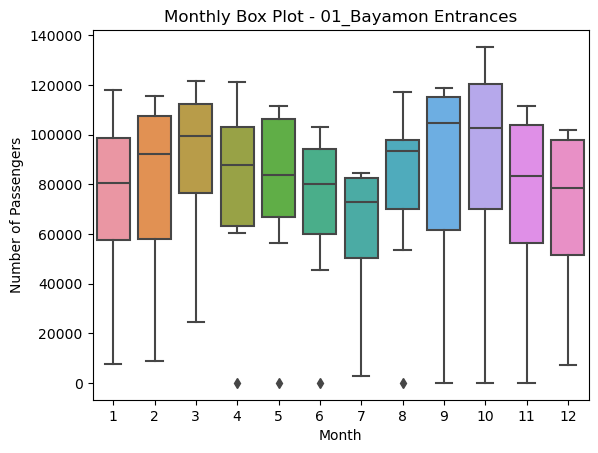

In [248]:
import seaborn as sns
sns.boxplot(x=df_cleaned['Month'].dt.month, y=df_cleaned['01_Bayamon_entradas'])
plt.title('Monthly Box Plot - 01_Bayamon Entrances')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()


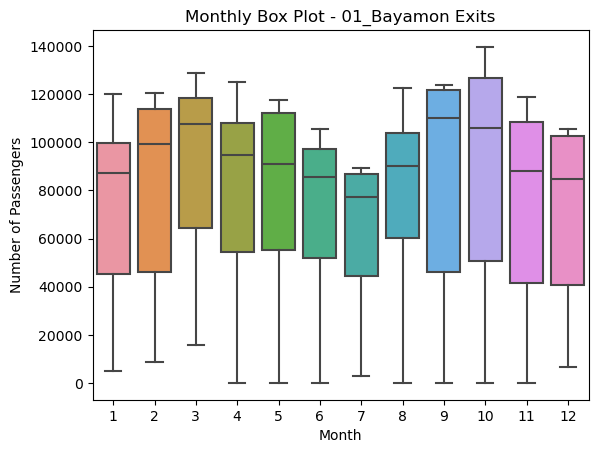

In [250]:
import seaborn as sns

# Replace 'Month' and 'Passengers' with your actual column names
sns.boxplot(x=df_cleaned['Month'].dt.month, y=df_cleaned['01_Bayamon_Salidas'])
plt.title('Monthly Box Plot - 01_Bayamon Exits')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

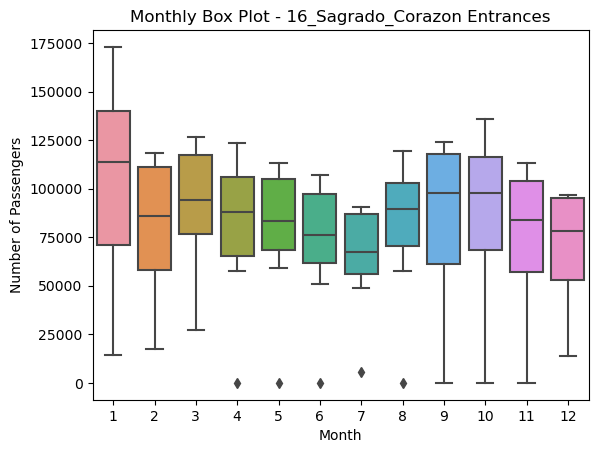

In [272]:
import seaborn as sns

# Replace 'Month' and 'Passengers' with your actual column names
sns.boxplot(x=df_cleaned['Month'].dt.month, y=df_cleaned['16_Sagrado_Corazon_entradas'])
plt.title('Monthly Box Plot - 16_Sagrado_Corazon Entrances')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()


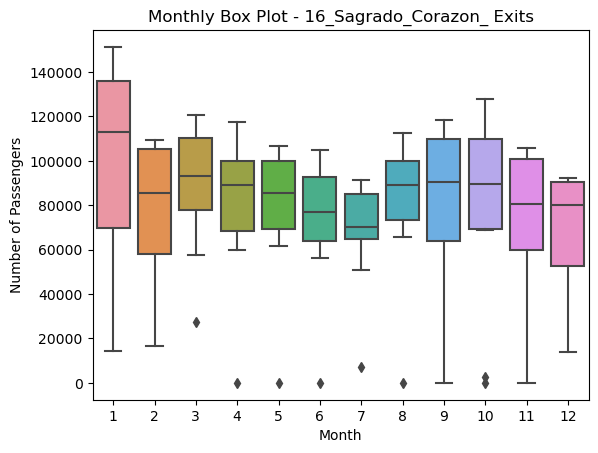

In [273]:
import seaborn as sns
sns.boxplot(x=df_cleaned['Month'].dt.month, y=df_cleaned['16_Sagrado_Corazon_Salidas'])
plt.title('Monthly Box Plot - 16_Sagrado_Corazon_ Exits')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

## Hypothesis Testing

In [50]:
from scipy import stats
group1 = df_cleaned['01_Bayamon_entradas']
group2 = df_cleaned['16_Sagrado_Corazon_entradas']

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: -0.8012873945383067
P-value: 0.42370475688096465


In [51]:
from scipy import stats
group1 = df_cleaned['01_Bayamon_Salidas']
group2 = df_cleaned['16_Sagrado_Corazon_Salidas']

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: -0.5596617973451868
P-value: 0.5762070241927034


In [53]:
from scipy import stats

total_entries = df_cleaned['Total_entradas_']
total_exits = df_cleaned['Total_Salidas_']

t_statistic, p_value = stats.ttest_ind(total_entries, total_exits, equal_var=False)
print(f"T-statistic: {t_statistic}\nP-value: {p_value}")

T-statistic: 0.8051346199301975
P-value: 0.4214836128674909


## Time Series Analysis and Forecasting 

Seasonal Decomposition plot

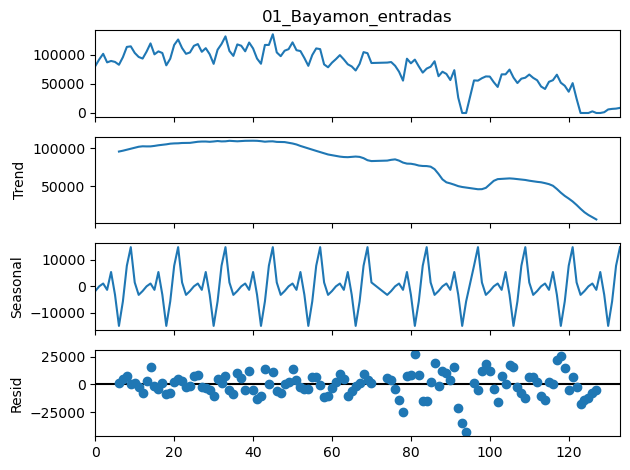

In [257]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_cleaned['01_Bayamon_entradas'], model='additive', period=12)
result.plot()
plt.show()


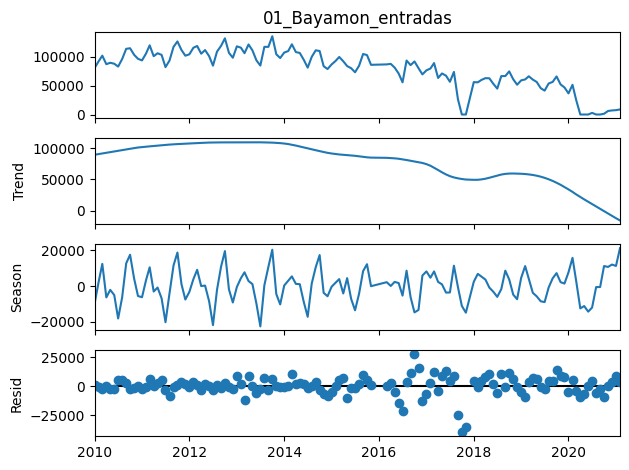

In [22]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
station_dataBE = df_cleaned[['Month','01_Bayamon_entradas']]
station_dataBE.set_index('Month', inplace=True)
result = STL(station_dataBE['01_Bayamon_entradas'],period=12).fit()
result.plot()
plt.show()


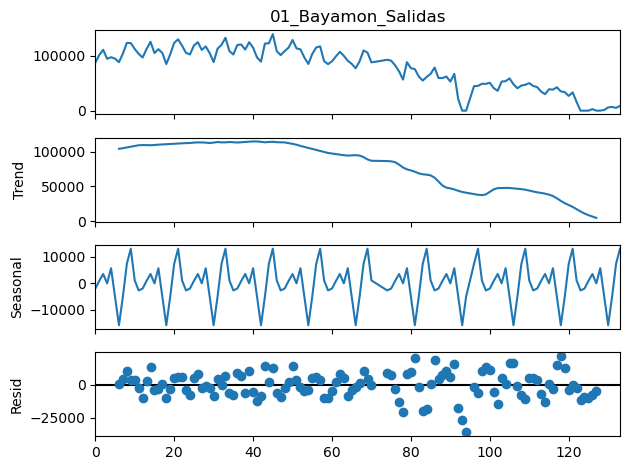

In [258]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_cleaned['01_Bayamon_Salidas'], model='additive', period=12)
result.plot()
plt.show()

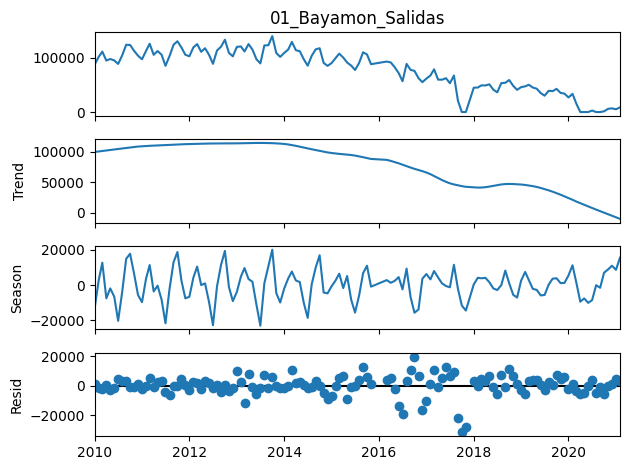

In [23]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt  
station_dataBS = df_cleaned[['Month','01_Bayamon_Salidas']]
station_dataBS.set_index('Month', inplace=True)
result = STL(station_dataBS['01_Bayamon_Salidas'],period=12).fit()
result.plot()
plt.show()


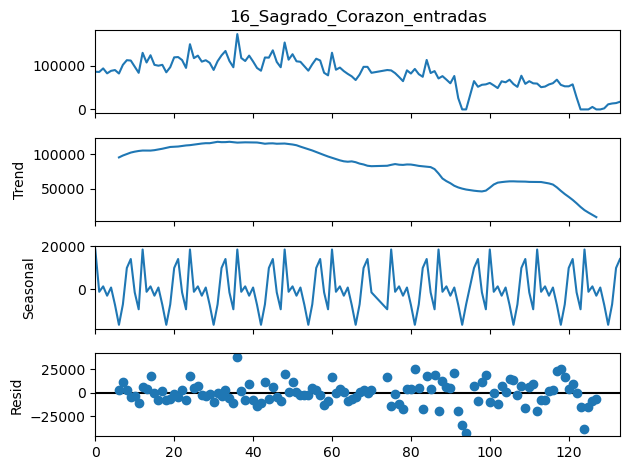

In [276]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_cleaned['16_Sagrado_Corazon_entradas'], model='additive', period=12)
result.plot()
plt.show()

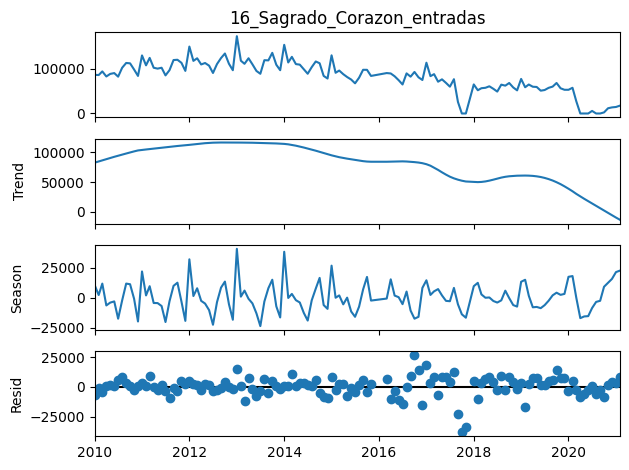

In [24]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
station_dataSCE = df_cleaned[['Month','16_Sagrado_Corazon_entradas']]
station_dataSCE.set_index('Month', inplace=True)
result = STL(station_dataSCE['16_Sagrado_Corazon_entradas'],period=12).fit()
result.plot()
plt.show()

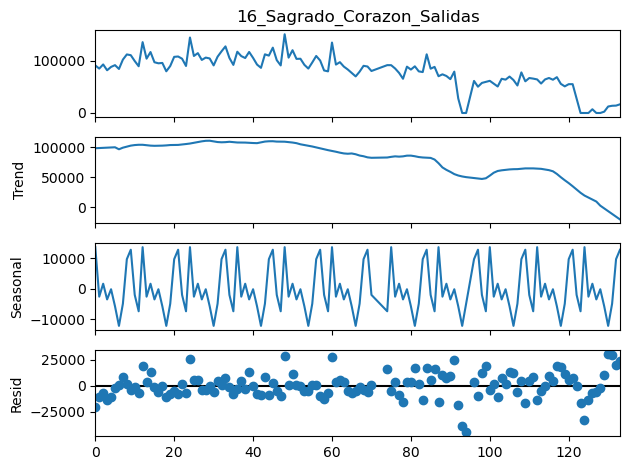

In [337]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_cleaned['16_Sagrado_Corazon_Salidas'], model='additive', period=12, extrapolate_trend=12)
result.plot()
plt.show()

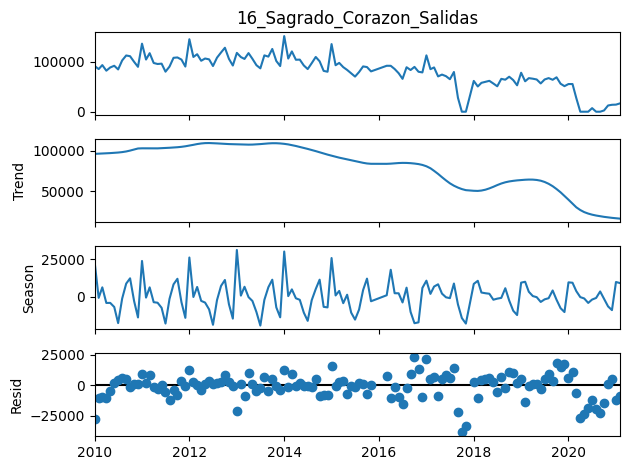

In [25]:
# from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
station_dataSCS = df_cleaned[['Month','16_Sagrado_Corazon_Salidas']]
station_dataSCS.set_index('Month', inplace=True)
result = STL(station_dataSCS['16_Sagrado_Corazon_Salidas'],period=12,seasonal_deg=0, trend_deg=0, low_pass_deg=0).fit()
result.plot()
plt.show()

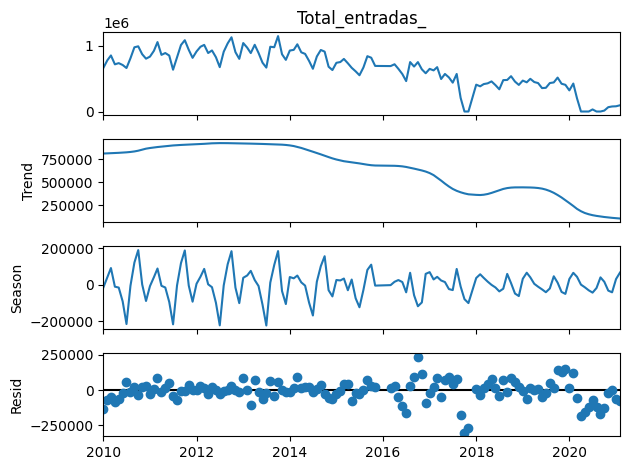

In [26]:
from statsmodels.tsa.seasonal import STL
station_dataTE = df_cleaned[['Month','Total_entradas_']]
station_dataTE.set_index('Month', inplace=True)
result = STL(station_dataTE['Total_entradas_'],period=12,seasonal_deg=0, trend_deg=0, low_pass_deg=0).fit()
result.plot()
plt.show()

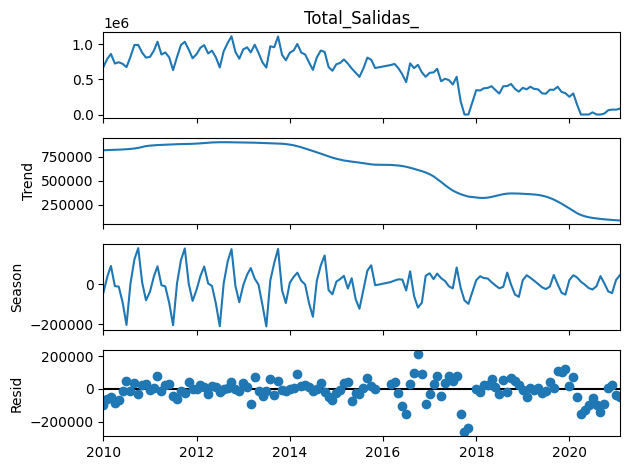

In [27]:
station_dataTS = df_cleaned[['Month','Total_Salidas_']]
station_dataTS.set_index('Month', inplace=True)
result = STL(station_dataTS['Total_Salidas_'],period=12,seasonal_deg=0, trend_deg=0, low_pass_deg=0).fit()
result.plot()
plt.show()

Forecast: Bayamon Entradas

In [38]:
IndexForecast = pd.date_range(station_dataBE.index.max(),periods=12,freq='m')

In [39]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_dataBE = df_cleaned[['Month','01_Bayamon_entradas']]
station_dataBE.set_index('Month', inplace=True)
result = STLForecast(station_dataBE['01_Bayamon_entradas'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [40]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28    80341.681540
2021-03-31    65389.217596
2021-04-30    66687.457041
2021-05-31    63559.310027
2021-06-30    65869.798076
2021-07-31    77268.474419
2021-08-31    77319.474585
2021-09-30    89046.410522
2021-10-31    88550.277043
2021-11-30    89883.169152
2021-12-31    89098.028254
2022-01-31    99046.822592
Freq: M, dtype: float64

Forecast: Bayamon Salidas

In [41]:
IndexForecast = pd.date_range(station_dataBS.index.max(),periods=12,freq='m')

In [42]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_dataBS = df_cleaned[['Month','01_Bayamon_Salidas']]
station_dataBS.set_index('Month', inplace=True)
result = STLForecast(station_dataBS['01_Bayamon_Salidas'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [43]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28    78660.392242
2021-03-31    67763.884916
2021-04-30    69602.186843
2021-05-31    67107.438110
2021-06-30    68653.712569
2021-07-31    77060.076201
2021-08-31    75628.807296
2021-09-30    84132.094066
2021-10-31    85979.537495
2021-11-30    88081.547198
2021-12-31    85762.179103
2022-01-31    92651.325803
Freq: M, dtype: float64

Forecast: Sagrado Corazon Entradas

In [28]:
IndexForecast = pd.date_range(station_dataSCE.index.max(),periods=12,freq='m')

In [32]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_dataSCE = df_cleaned[['Month','16_Sagrado_Corazon_entradas']]
station_dataSCE.set_index('Month', inplace=True)
result = STLForecast(station_dataSCE['16_Sagrado_Corazon_entradas'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [33]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28     81232.967849
2021-03-31     64057.382114
2021-04-30     65485.079817
2021-05-31     65739.131486
2021-06-30     72554.650769
2021-07-31     77659.097031
2021-08-31     78597.714228
2021-09-30     90356.913003
2021-10-31     93689.660927
2021-11-30     96913.647078
2021-12-31    102624.372394
2022-01-31    103898.370929
Freq: M, dtype: float64

Forecast: Sagrado Corazon Salidas

In [364]:
IndexForecast = pd.date_range(station_data.index.max(),periods=12,freq='m')

In [365]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_data = df_cleaned[['Month','16_Sagrado_Corazon_Salidas']]
station_data.set_index('Month', inplace=True)
result = STLForecast(station_data['16_Sagrado_Corazon_Salidas'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [366]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28     78711.589924
2021-03-31     62654.625326
2021-04-30     63377.699575
2021-05-31     64139.997961
2021-06-30     74413.132905
2021-07-31     77918.220071
2021-08-31     76897.779870
2021-09-30     87470.762857
2021-10-31     91924.653317
2021-11-30     93694.480740
2021-12-31    100686.534956
2022-01-31    100683.742070
Freq: M, dtype: float64

Forecast: Total Entradas

In [44]:
IndexForecast = pd.date_range(station_dataTE.index.max(),periods=12,freq='m')

In [45]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_dataTE = df_cleaned[['Month','Total_entradas_']]
station_dataTE.set_index('Month', inplace=True)
result = STLForecast(station_dataTE['Total_entradas_'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [46]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28    647905.609156
2021-03-31    522691.609954
2021-04-30    538654.718733
2021-05-31    521587.934626
2021-06-30    560855.227646
2021-07-31    627886.190071
2021-08-31    623523.608567
2021-09-30    717072.969860
2021-10-31    729327.732709
2021-11-30    755334.914829
2021-12-31    745774.932521
2022-01-31    815913.371011
Freq: M, dtype: float64

Forecast: Total Salidas

In [47]:
IndexForecast = pd.date_range(station_dataTS.index.max(),periods=12,freq='m')

In [48]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

station_dataTS = df_cleaned[['Month','Total_Salidas_']]
station_dataTS.set_index('Month', inplace=True)
result = STLForecast(station_dataTS['Total_Salidas_'],ARIMA,period=12).fit()
resultForecast = result.forecast(12)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [49]:
resultForecast.index=IndexForecast
resultForecast

2021-02-28    612047.530103
2021-03-31    520752.124531
2021-04-30    537500.573239
2021-05-31    525089.610989
2021-06-30    556827.454408
2021-07-31    607461.101557
2021-08-31    596643.575256
2021-09-30    666985.354061
2021-10-31    682059.490468
2021-11-30    700731.948477
2021-12-31    696518.293874
2022-01-31    738163.861458
Freq: M, dtype: float64

In [54]:
df_cleaned

,Month,01_Bayamon_entradas,02_Deportivo_entradas,03_Jardines_entradas,04_Torrimar_entradas,05_Martinez_Nadal_entradas,06_Las_Lomas_entradas,07_San_Francisco_entradas,08_Centro_Medico_entradas,09_Cupey_entradas,10_Rio_Piedras_entradas,11_Universidad_entradas,12_Piñero_entradas,13_Domenech_entradas,14_Roosevelt_entradas,15_Hato_Rey_entradas,16_Sagrado_Corazon_entradas,Total_entradas_,01_Bayamon_Salidas,02_Deportivo_Salidas,03_Jardines_Salidas,04_Torrimar_Salidas,05_Martinez_Nadal_Salidas,06_Las_Lomas_Salidas,07_San_Francisco_Salidas,08_Centro_Medico_Salidas,09_Cupey_Salidas,10_Rio_Piedras_Salidas,11_Universidad_Salidas,12_Piñero_Salidas,13_Domenech_Salidas,14_Roosevelt_Salidas,15_Hato_Rey_Salidas,16_Sagrado_Corazon_Salidas,Total_Salidas_
0,2010-01-01,80600.0,77677.0,11293.0,16808.0,47797.0,17040.0,35450.0,51473.0,28619.0,57444.0,35969.0,24590.0,23187.0,31448.0,39294.0,86565.0,665254.0,87245.0,75163.0,11221.0,16250.0,46474.0,16629.0,30233.0,54009.0,27402.0,62187.0,40129.0,26769.0,22041.0,32166.0,36774.0,91442.0,676134.0
1,2010-02-01,92126.0,92312.0,13018.0,18653.0,53642.0,20636.0,38382.0,61697.0,39095.0,63805.0,70725.0,29396.0,28706.0,36686.0,35323.0,86024.0,780226.0,101550.0,90622.0,13109.0,18823.0,54616.0,20002.0,35075.0,63621.0,38442.0,69641.0,72870.0,31909.0,27873.0,37367.0,32620.0,85314.0,793454.0
2,2010-03-01,101720.0,100045.0,14263.0,19543.0,58111.0,23321.0,41555.0,68864.0,40932.0,68010.0,78531.0,32474.0,31866.0,41354.0,39036.0,94160.0,853785.0,111164.0,97293.0,14192.0,19766.0,59484.0,21925.0,37313.0,71153.0,39767.0,73831.0,77079.0,34904.0,30669.0,41925.0,37043.0,93291.0,860799.0
3,2010-04-01,87015.0,82708.0,12311.0,17114.0,49165.0,20348.0,37185.0,59156.0,35414.0,59284.0,49383.0,28854.0,27576.0,36049.0,34079.0,82836.0,718477.0,94698.0,81087.0,12365.0,16788.0,49630.0,19432.0,33723.0,61055.0,34433.0,62365.0,49558.0,30716.0,27087.0,37005.0,32408.0,82107.0,724457.0
4,2010-05-01,89439.0,82142.0,13865.0,17281.0,49681.0,21182.0,41151.0,62734.0,34189.0,72216.0,25348.0,31135.0,28680.0,35566.0,43530.0,88590.0,736729.0,97554.0,79130.0,13602.0,17068.0,51725.0,20280.0,38231.0,64056.0,32531.0,77510.0,25023.0,33507.0,27058.0,36819.0,40458.0,88541.0,743093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-10-01,1318.0,1242.0,406.0,359.0,846.0,560.0,765.0,1005.0,542.0,1986.0,432.0,690.0,749.0,599.0,360.0,2455.0,14314.0,1340.0,611.0,344.0,326.0,909.0,532.0,607.0,930.0,553.0,1744.0,353.0,686.0,681.0,440.0,317.0,2517.0,12890.0
130,2020-11-01,6088.0,5195.0,1953.0,1874.0,3561.0,2889.0,3798.0,4318.0,2632.0,8863.0,2264.0,3090.0,3195.0,2820.0,1848.0,11739.0,66127.0,5914.0,5028.0,1598.0,1773.0,3918.0,2632.0,3019.0,4257.0,2559.0,7453.0,1666.0,2949.0,2612.0,1918.0,1438.0,12450.0,61184.0
131,2020-12-01,7055.0,6121.0,2120.0,2360.0,4337.0,3370.0,4416.0,4974.0,3147.0,10005.0,2595.0,3559.0,3690.0,3440.0,2112.0,13642.0,76943.0,6775.0,5823.0,1721.0,2182.0,4774.0,3030.0,3334.0,4714.0,3092.0,8419.0,1774.0,3465.0,3125.0,2162.0,1537.0,13876.0,69803.0
132,2021-01-01,7512.0,6675.0,2018.0,2169.0,4447.0,3294.0,4518.0,5402.0,3256.0,9986.0,2735.0,3837.0,3825.0,3349.0,2178.0,14583.0,79784.0,5113.0,5882.0,1696.0,2151.0,4748.0,3020.0,3308.0,4929.0,3464.0,8071.0,2086.0,3456.0,3313.0,2138.0,1653.0,14184.0,69212.0


## Data transformation for use in Tableau Public

In [367]:
df_cleaned.columns

Index(['Month', '01_Bayamon_entradas', '02_Deportivo_entradas',
       '03_Jardines_entradas', '04_Torrimar_entradas',
       '05_Martinez_Nadal_entradas', '06_Las_Lomas_entradas',
       '07_San_Francisco_entradas', '08_Centro_Medico_entradas',
       '09_Cupey_entradas', '10_Rio_Piedras_entradas',
       '11_Universidad_entradas', '12_Piñero_entradas', '13_Domenech_entradas',
       '14_Roosevelt_entradas', '15_Hato_Rey_entradas',
       '16_Sagrado_Corazon_entradas', 'Total_entradas_', '01_Bayamon_Salidas',
       '02_Deportivo_Salidas', '03_Jardines_Salidas', '04_Torrimar_Salidas',
       '05_Martinez_Nadal_Salidas', '06_Las_Lomas_Salidas',
       '07_San_Francisco_Salidas', '08_Centro_Medico_Salidas',
       '09_Cupey_Salidas', '10_Rio_Piedras_Salidas', '11_Universidad_Salidas',
       '12_Piñero_Salidas', '13_Domenech_Salidas', '14_Roosevelt_Salidas',
       '15_Hato_Rey_Salidas', '16_Sagrado_Corazon_Salidas', 'Total_Salidas_'],
      dtype='object')

In [369]:
pd.melt(df_cleaned,id_vars='Month',value_vars=['01_Bayamon_entradas', '02_Deportivo_entradas',
       '03_Jardines_entradas', '04_Torrimar_entradas',
       '05_Martinez_Nadal_entradas', '06_Las_Lomas_entradas',
       '07_San_Francisco_entradas', '08_Centro_Medico_entradas',
       '09_Cupey_entradas', '10_Rio_Piedras_entradas',
       '11_Universidad_entradas', '12_Piñero_entradas', '13_Domenech_entradas',
       '14_Roosevelt_entradas', '15_Hato_Rey_entradas',
       '16_Sagrado_Corazon_entradas', 'Total_entradas_', '01_Bayamon_Salidas',
       '02_Deportivo_Salidas', '03_Jardines_Salidas', '04_Torrimar_Salidas',
       '05_Martinez_Nadal_Salidas', '06_Las_Lomas_Salidas',
       '07_San_Francisco_Salidas', '08_Centro_Medico_Salidas',
       '09_Cupey_Salidas', '10_Rio_Piedras_Salidas', '11_Universidad_Salidas',
       '12_Piñero_Salidas', '13_Domenech_Salidas', '14_Roosevelt_Salidas',
       '15_Hato_Rey_Salidas', '16_Sagrado_Corazon_Salidas', 'Total_Salidas_']).to_csv('dataframeMethod.csv', index=False)